In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy.builtins import *
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [209]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


Start by fitting a linear regression model with target being life expectancy and predictor variable year.

<b>a. What coefficients do you get? Interpret the meaning of these coefficents.</b>

In [211]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [212]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

For every one unit increase in year, life expectancy increase by 0.26.
The negative intercept doesn't make sense here because life expecntancy will not be in negative. For Year 0, it will be -468.1318


<b>b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?</b>


In [183]:
lr_life_expectancy_mod = smf.ols("Life_Expectancy ~ I(Year - 1990)", data=gdp_le).fit()

In [184]:
lr_life_expectancy_mod.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 64.628889 + 0.267722(Year)$$

The new coefficient is 0.268 which means that for a given year after 1990 the life expectancy is increaed by 0.267 year.

Intercept - The estimated life expectancy for year 1990 is 64.628889

<b>C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do? </b>

In [213]:
yearly_exp = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
yearly_exp['Estimated_Mean'] = lr_life_expectancy_mod.predict(yearly_exp)
yearly_exp.head()

,Year,Life_Expectancy,Estimated_Mean
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


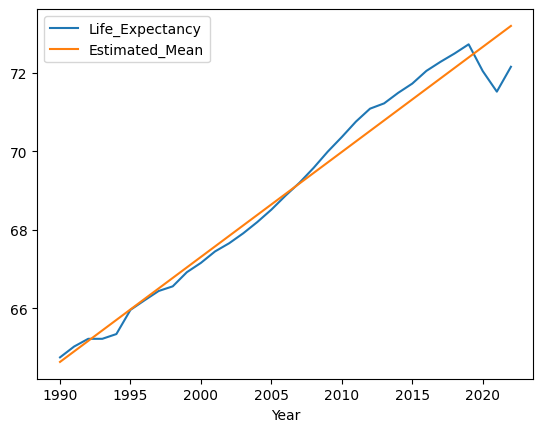

In [215]:
fig,ax = plt.subplots()
yearly_exp.plot(x='Year',y='Life_Expectancy', ax=ax)
yearly_exp.plot(x='Year',y='Estimated_Mean', ax=ax);


<b>d. Plot the actual values against your model's estimates for the mean life expectancy.</b>

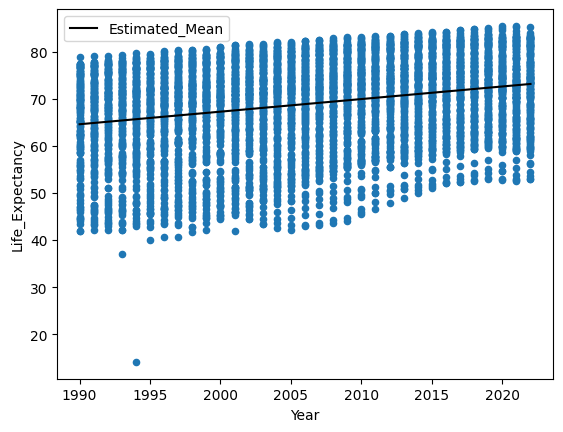

In [216]:
fig,ax = plt.subplots()
gdp_le.plot(kind='scatter',x='Year',y='Life_Expectancy', ax=ax)
yearly_exp.plot(x='Year',y='Estimated_Mean', ax=ax,color='black');

In [186]:
pred_df = pd.DataFrame(
    {
        'Year': np.arange(gdp_le['Year'].min(), gdp_le['Year'].max()) #used np.arrange as year is whole number
    }
)

pred_df['mean_estimate'] = lr_life_expectancy_mod.predict(pred_df)

pred_df

,Year,mean_estimate
0,1990,64.628889
1,1991,64.896612
2,1992,65.164334
3,1993,65.432056
4,1994,65.699778
5,1995,65.967500
6,1996,66.235222
7,1997,66.502944
8,1998,66.770666
9,1999,67.038389


Plot these estimates with original dataset

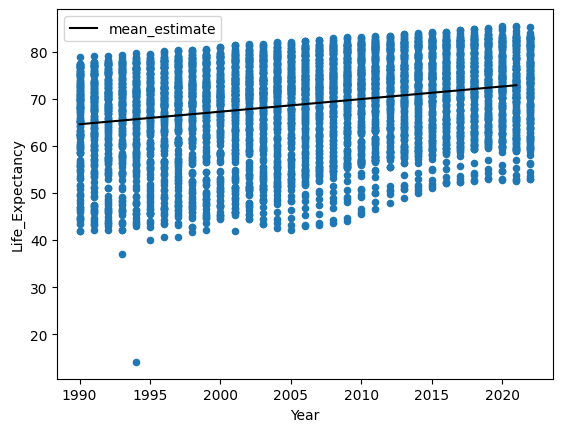

In [188]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);

<b>e. Inspect the R-squared value for the model. does it make sense, given the plot? </b>

The R-Squared values is 0.072 which is about 7.2% variability of life expectancy. The R-squared is very low from the model which raises questions on the strength of this relationship.


<b>2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.</b>


a. What coefficients do you get? Interpret the meaning of those coefficients.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

c. Are the coefficients statistically significant?

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000? e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [189]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [190]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


<b>. What coefficients do you get? Interpret the meaning of those coefficients.</b>

In [191]:
lr_le_gdp_capita = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

In [192]:
lr_le_gdp_capita.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 65.949870 + 0.000257(GDS Per capita)$$

Based on the coefficients it means that every unit change in GDP Per Capita, the life expectancy is 0.000257

 <b>2.Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients? </b>

In [193]:
lr_le_gdp_capita_mod = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita / 1000)", data=gdp_le_2021).fit()
lr_le_gdp_capita_mod.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectancy) = 65.949870 + 0.256892(GDP Per capita)$$

There is a significant change in the coefficient. Per ($1000) change in GDP per Capita, the life expectancy is now increased by 0.256892

<b>c. Are the coefficients statistically significant?</b>

In [194]:
lr_le_gdp_capita_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        21:03:51   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the P-Value, the coefficients are statistically significant.

### Lets run the assumptions

(array([ 5.,  5.,  5., 17., 13., 26., 32., 32., 28., 10.]),
 array([-14.53845349, -12.16985805,  -9.80126261,  -7.43266717,
         -5.06407172,  -2.69547628,  -0.32688084,   2.0417146 ,
          4.41031004,   6.77890549,   9.14750093]),
 <BarContainer object of 10 artists>)

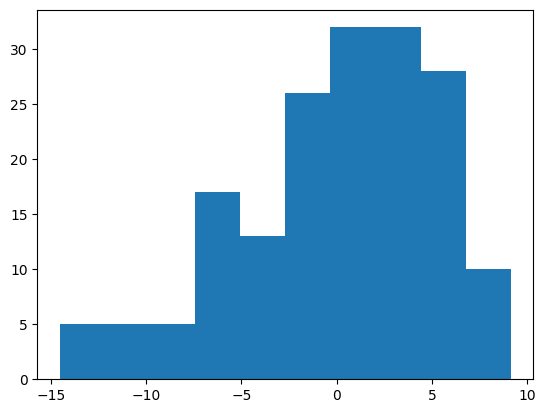

In [217]:
plt.hist(lr_le_gdp_capita_mod.resid)

In [220]:
# run the hypothesis test
#NULL - it comes from normal distribution
#HA - It doesn not come from normal distribution
sms.jarque_bera(lr_le_gdp_capita_mod.resid)

(12.724842533019249,
 0.0017251845192994518,
 -0.663772598543498,
 2.9459646075602683)

Based on the P-Value 0.001725, we can say that it does come from normal distribution.

In [221]:
#run the QQ plot.
from scipy.stats import probplot

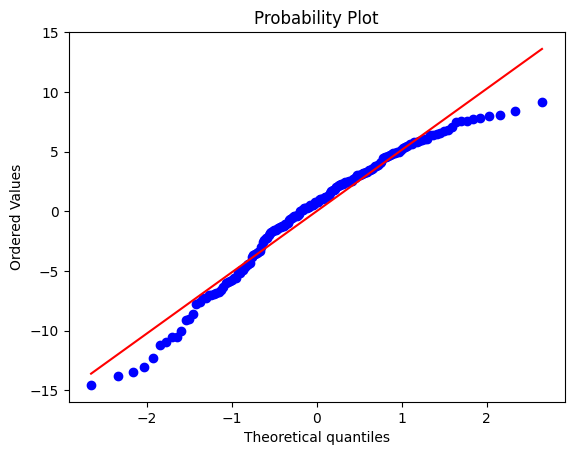

In [222]:
probplot(lr_le_gdp_capita_mod.resid,plot=plt);

The upper and lower range is smaller the expected per normal distribution.

In [224]:
sms.het_breuschpagan(lr_le_gdp_capita_mod.resid,lr_le_gdp_capita_mod.model.exog)

(1.0321627180645492,
 0.3096512481674583,
 1.0263536925202543,
 0.31244794073203624)

The P-value is 0.309651.

<b> d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? </b>

<b>What about one whose gdp per capita is $100,000? </b>

In [195]:
lr_le_gdp_capita_mod.predict(pd.DataFrame({'GDP_Per_Capita': [50000]}))

0    78.794457
dtype: float64

The model estimates life expectancy = 78.794

In [196]:
lr_le_gdp_capita_mod.predict(pd.DataFrame({'GDP_Per_Capita': [100000]}))

0    91.639045
dtype: float64

The model estimates life expectancy = 91.639

In [229]:
pred_df1 = pd.DataFrame({'GDP_Per_Capita': np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), gdp_le_2021['GDP_Per_Capita'].max())}
)

pred_df1['mean_estimate'] = lr_le_gdp_capita_mod.predict(pred_df1)

pred_df1

,GDP_Per_Capita,mean_estimate
0,714.066712,66.133308
1,3060.381549,66.736057
2,5406.696386,67.338806
3,7753.011222,67.941554
4,10099.326059,68.544303
5,12445.640896,69.147052
6,14791.955732,69.749801
7,17138.270569,70.352550
8,19484.585406,70.955299
9,21830.900242,71.558048


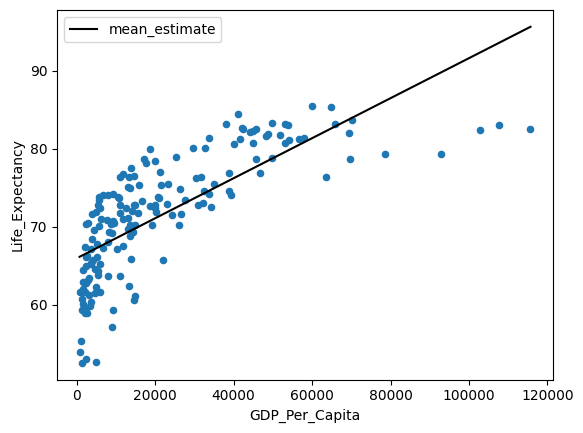

In [231]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
pred_df1.plot(x="GDP_Per_Capita", y="mean_estimate", ax=ax, color="black");



<b>3. Now, fit a model for life expectancy based on the log of gdp per capita.</b>

In [148]:
#gdp_le_2021['log_gdp_per_capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
#no need 

In [149]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


In [232]:
lr_le_log_gdp_capita = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)", data=gdp_le_2021).fit()
lr_le_log_gdp_capita.params

Intercept                 18.946970
np.log(GDP_Per_Capita)     5.589014
dtype: float64

<B>Inspect the coefficients for this model. Are they statistically significant? </b>

In [155]:
lr_le_log_gdp_capita.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        20:22:30   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18.9470      2.547      7.438      0.000      13.919      23.975
np.log(GDP_Per_Capita)     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After checking the  P-Value, the coefficients appear to be statistically significant.

### Lets look at the assumptions:

(array([ 3.,  3.,  3.,  5., 22., 33., 38., 31., 25., 10.]),
 array([-13.78652303, -11.61719861,  -9.4478742 ,  -7.27854979,
         -5.10922538,  -2.93990096,  -0.77057655,   1.39874786,
          3.56807227,   5.73739669,   7.9067211 ]),
 <BarContainer object of 10 artists>)

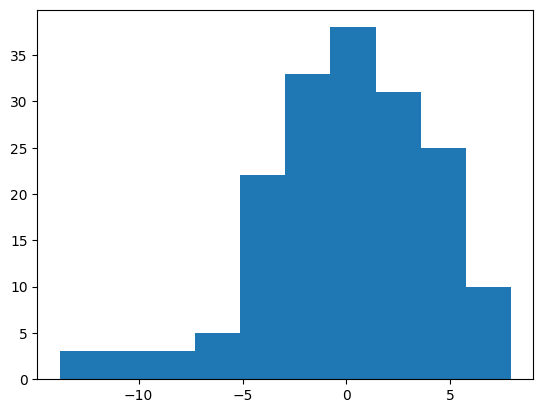

In [233]:
plt.hist(lr_le_log_gdp_capita.resid)

We still see it is skewed a bit.

In [236]:
sms.jarque_bera(lr_le_log_gdp_capita.resid)

(18.921818757307857,
 7.783577662769136e-05,
 -0.724533395659447,
 3.724705203405056)

The P value is small, so we cannot say that it came from normal distribution.

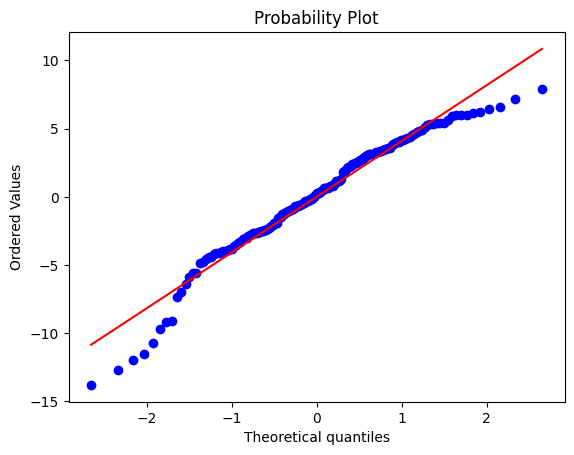

In [238]:
probplot(lr_le_log_gdp_capita.resid,plot=plt);

In [240]:
sms.het_breuschpagan(lr_le_log_gdp_capita.resid,lr_le_log_gdp_capita.model.exog)

(2.456583536135878,
 0.11703308952220823,
 2.463160369302461,
 0.11839264443085522)

### Lets use bootstrap to fix it?

In [245]:
bootstrat_coef=[]
num_resamples = 1000

for _ in range(num_resamples):
    boot_df = gdp_le.sample(n=len(gdp_le_2021), replace = True).copy()
    lr_boot = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)",data = boot_df).fit()
    bootstrat_coef.append(lr_boot.params['np.log(GDP_Per_Capita)'])

In [248]:
np.quantile(bootstrat_coef,q=[0.025, 0.975])

array([5.90062538, 7.14719242])

<b>b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? </b>

The cofficients suggest that for every log unit change in GDP per capita, the life expectancy changes by 5.58

In [159]:
lr_le_log_gdp_capita.predict(pd.DataFrame({'GDP_Per_Capita': [(50000)]}))

0    79.418861
dtype: float64

<b>What about for those with a gdp per capita of $100,000? </b>

In [161]:
lr_le_log_gdp_capita.predict(pd.DataFrame({'GDP_Per_Capita': [(100000)]}))

0    83.29287
dtype: float64

<b> c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?</b>

In [249]:
pred_df1 = pd.DataFrame({'GDP_Per_Capita': np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), gdp_le_2021['GDP_Per_Capita'].max())}
)

pred_df1['mean_estimate'] = lr_le_log_gdp_capita.predict(pred_df1)

pred_df1

,GDP_Per_Capita,mean_estimate
0,714.066712,55.672248
1,3060.381549,63.806043
2,5406.696386,66.986744
3,7753.011222,69.001265
4,10099.326059,70.478930
5,12445.640896,71.646484
6,14791.955732,72.611780
7,17138.270569,73.434653
8,19484.585406,74.151778
9,21830.900242,74.787264


<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

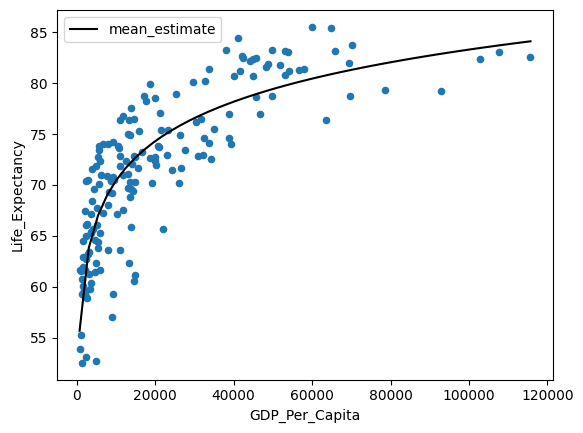

In [253]:
fig,ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
pred_df1.plot(x='GDP_Per_Capita', y='mean_estimate',ax=ax, color = 'black')

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


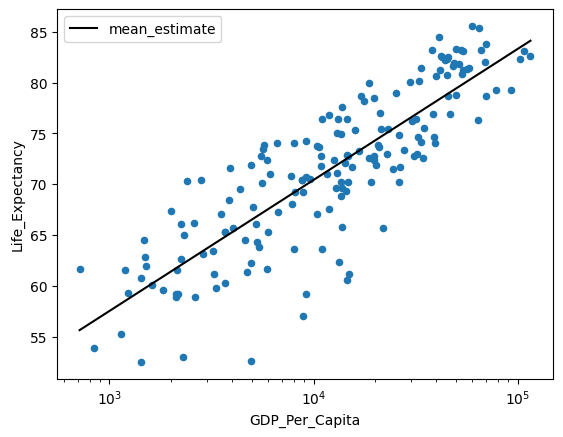

In [254]:
#lets look at plot with log :
fig,ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax, logx= True)
pred_df1.plot(x='GDP_Per_Capita', y='mean_estimate',ax=ax, color = 'black', logx=True)

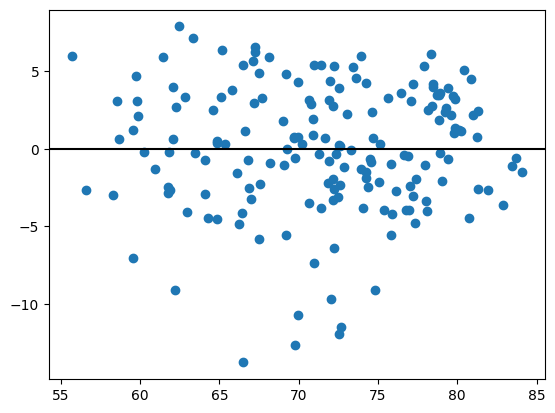

In [36]:
plt.scatter(lr_le_log_gdp_capita.fittedvalues, lr_le_log_gdp_capita.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);

<br>

<b>Finally, return to the full dataset.
    
    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    
    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?</b>

In [37]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [38]:
gdp_le['log_le_gdp_per_capita'] = np.log(gdp_le['GDP_Per_Capita'])

In [39]:
lr_le_log_gdp_capita_main = smf.ols("Life_Expectancy ~ log_le_gdp_per_capita", data=gdp_le).fit()
lr_le_log_gdp_capita_main.params

Intercept                9.194102
log_le_gdp_per_capita    6.531130
dtype: float64

In [40]:
lr_le_log_gdp_capita_main.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:33:10   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.1941      0.532     17.297      0.000       8.152      10.236
log_le_gdp_per_capita     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
lr_le_log_gdp_capita_main_Year = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita) + I(Year-1990)", data=gdp_le).fit()
lr_le_log_gdp_capita_main_Year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:38:01   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.5612      0.517     16.563      0.000       7.548       9.574
np.log(GDP_Per_Capita)     6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)             0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients have been changed now by bringing "Year" into the model. Basically the intercept is totally switched into negative 
which really doen't make sense in this case.It would be good to skip year variable from this model as it is impcating the
target variable.



### Linear Regression Practice Stretch Questions

1. So far, we've looked at the effect of gdp per capita alone on life expectancy. Let's see what happens if we also consider the continent variable. For this question, return to the 2021 subset.  
    a. Fit a model for life expectancy using log of gdp per capita and continent. How does this compare to the model that just used log of gdp per capita? Interpret the meaning of the coefficients you get with this new model.  
    b. Now, add an interaction term between continent and log gdp per capita. Are the interaction terms statistically significant? Interpret the meaning of the interaction terms.

In [42]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp_per_capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5377,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5439,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [258]:
lr_le_log_gdp_capita_2021 = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita) + Continent", data=gdp_le_2021).fit()
lr_le_log_gdp_capita_2021.params

Intercept                     25.883441
Continent[T.Asia]              5.183673
Continent[T.Europe]            5.104175
Continent[T.North America]     4.175711
Continent[T.Oceania]           4.765647
Continent[T.South America]     2.759830
np.log(GDP_Per_Capita)         4.484066
dtype: float64

In [259]:
lr_le_log_gdp_capita_2021.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.22
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           5.93e-50
Time:                        16:40:50   Log-Likelihood:                -473.20
No. Observations:                 173   AIC:                             960.4
Df Residuals:                     166   BIC:                             982.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     25.8834      2.885      8.973      0.000      20.188      31.579
Continent[T.Asia]              5.1837      0.958      5.408      0.000       3.291       7.076
Continent[T.Europe]            5.1042      1.104      4.625      0.000       2.925       7.283
Continent[T.North America]     4.1757      1.083      3.854      0.000       2.037       6.315
Continent[T.Oceania]           4.7656      1.251      3.809      0.000       2.295       7.236
Continent[T.South America]     2.7598      1.367      2.019      0.045       0.060       5.459
np.log(GDP_Per_Capita)         4.4841      0.343     13.056      0.000       3.806       5.162
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.693
Skew:                          -0.298   Prob(JB):                        0.260
Kurtosis:                       2.863   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""